# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

In [20]:
import numpy as np
import pandas as pd

In [21]:
# Lendo dados

url = "Preco_Casas.csv"
df = pd.read_csv(url)
df.head()


,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [22]:
# Quais fatores coletados?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [23]:
# Removendo coluna Id (não é um fator relevante)

df = df.drop(columns = 'Id')

df.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


In [24]:
# Compreendendo a correlação entre os fatores

corr = df.corr()

In [25]:
# Correlação com a variável resposta

corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

# Quais fatores estão mais correlacionados? 

In [26]:
# Importando bibliotecas de visualização

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

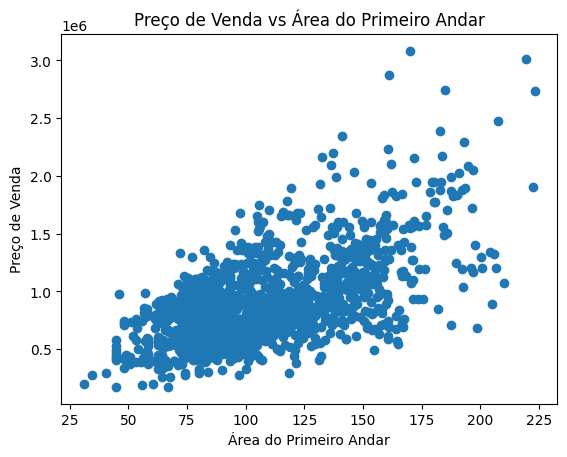

In [48]:
# Como é a relação entre área construida e o preço do imóvel?

plt.scatter(df['area_primeiro_andar'], df['preco_de_venda'])

plt.title('Preço de Venda vs Área do Primeiro Andar')
plt.xlabel('Área do Primeiro Andar')
plt.ylabel('Preço de Venda')
plt.show()



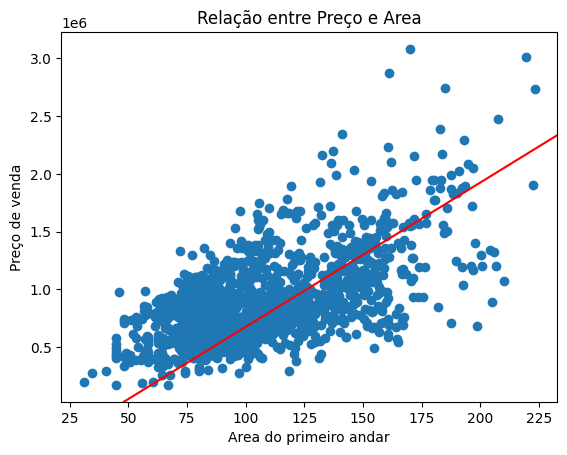

In [47]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?

plt.scatter(df['area_primeiro_andar'], df['preco_de_venda'])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")
plt.show()



## Melhorando a reta


Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

In [50]:
# Qual a reta que melhor se adequa a relação?
# Usando plotly para adicionar uma linha de tendência

px.scatter(df, x='area_primeiro_andar', y='preco_de_venda', 
           title='Preço de Venda vs Área do Primeiro Andar', 
           trendline_color_override='red', trendline='ols')

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [30]:
# Importando biblioteca para dividir os dados em treino e teste

from sklearn.model_selection import train_test_split

In [31]:
# Definindo X e y

y = df['preco_de_venda']
X = df.drop(columns='preco_de_venda')

In [32]:
# Dividindo os dados em treino e teste

SEED = 47

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3  , random_state = SEED)

In [33]:
# Dados de treino para usar a fórmula
# Transformando X_train em DataFrame e adicionando y_train como coluna

df_train = pd.DataFrame(X_train)
df_train['preco_de_venda'] = y_train

## Analisando os coeficientes

(intensidade, direção e significância)




In [34]:
# Importando a biblioteca para usar a fórmula

from statsmodels.formula.api import ols

In [35]:
# Criando o primeiro modelo de regressão linear simples

modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

In [36]:
# Verificando os parâmetros do modelo

modelo_0.params

# valor médio do preço de venda quando a area_primeiro_andar é zero -> 164.657
# para cada aumento de 1 unidade na area_primeiro_andar, o preço de venda aumenta em média 6695

Intercept              121894.063438
area_primeiro_andar      7133.814724
dtype: float64

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 121.894,38. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 7133.81. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


In [37]:
# Verificando o resumo do modelo

print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     642.5
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          5.75e-110
Time:                        16:17:21   Log-Likelihood:                -14111.
No. Observations:                1006   AIC:                         2.823e+04
Df Residuals:                    1004   BIC:                         2.824e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.219e+05   3

## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [ ]:
# Coeficiente de determinação R²    

modelo_0.rsquared    

# O tamanho do primeiro andar explica 39% da variação nos preços das casas
# precisamos de mais fatores (outros 61%) para explicar melhor o preço das casas

np.float64(0.39022622648698824)

## Entendendo o resíduo

In [ ]:
# Verificando os resíduos do modelo

modelo_0.resid

1203   -190974.324494
173    -308943.584844
791    -103355.823570
100     108157.370593
1283    -49107.986268
            ...      
691     -55297.443067
584    -191957.865848
1288   -140768.680651
327    -680423.901712
1159    -97058.338732
Length: 1006, dtype: float64

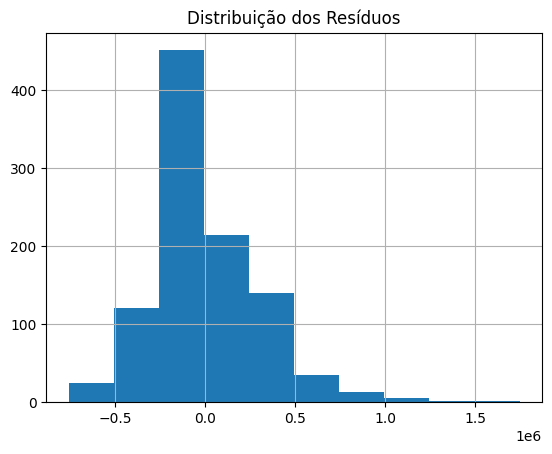

In [52]:
# Distribuição dos resíduos

modelo_0.resid.hist()
plt.title('Distribuição dos Resíduos')  
plt.show()

![](https://i.imgur.com/CJMdXpf.png)

## Obtendo o R² da previsão

In [55]:
# Definindo o y_predict

y_predict = modelo_0.predict(X_test)

In [59]:
# Importando a métrica R²

from sklearn.metrics import r2_score

In [65]:
# Verificando o R² nos dados de teste

r2_score(y_test, y_predict)

0.346353354431552

# Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.34, ou seja, aproximadamente 34% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

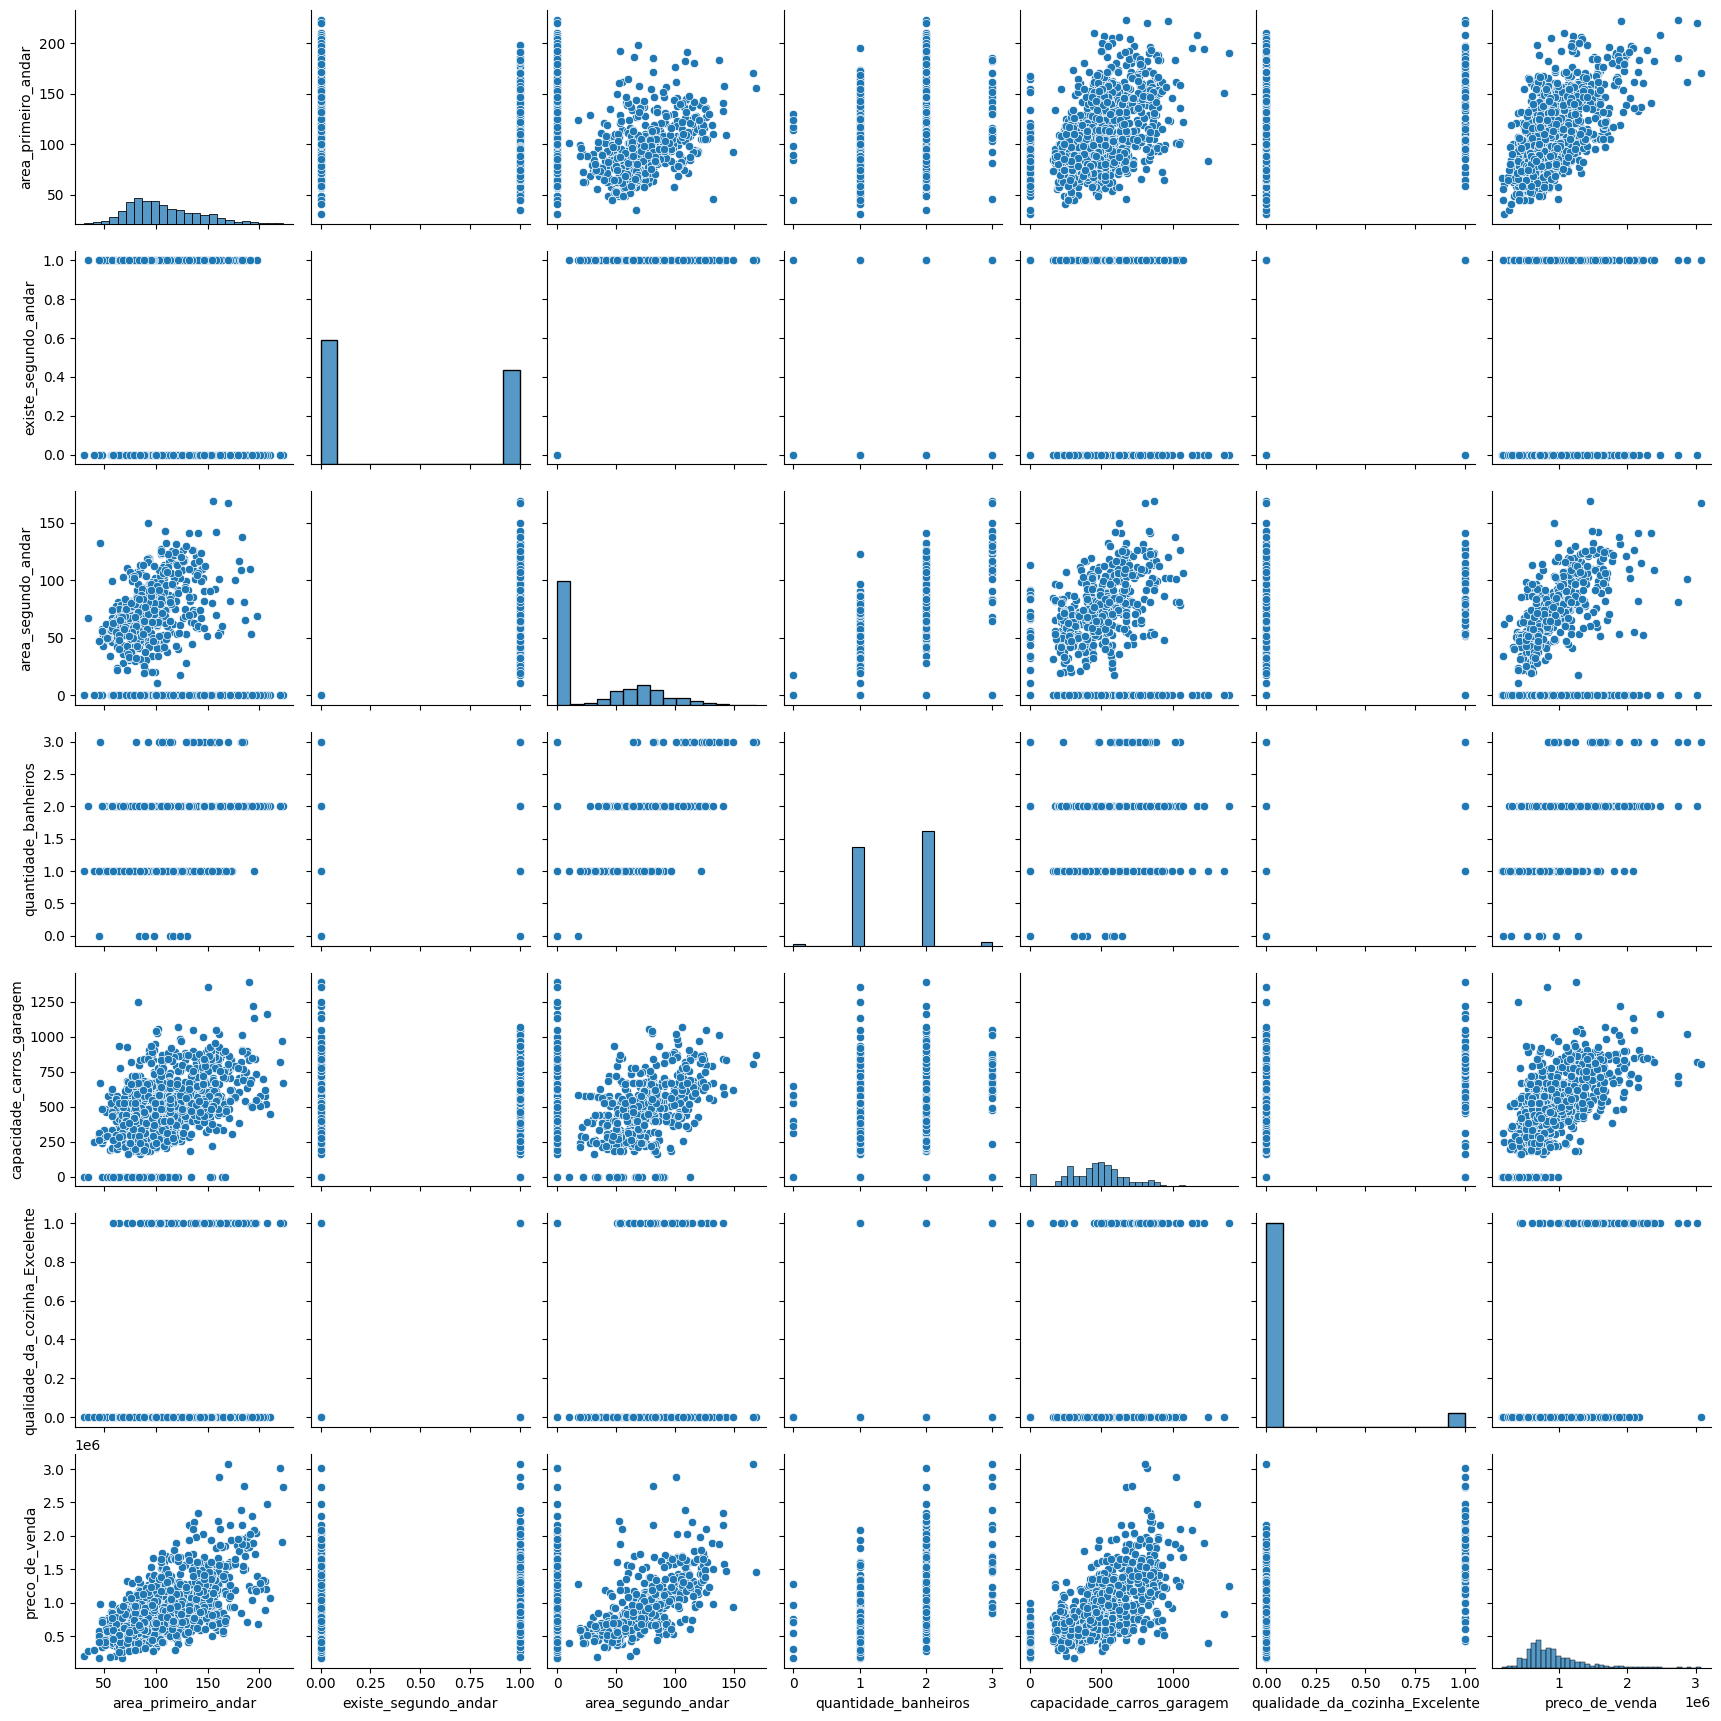

In [78]:
# Adicionando outras características

sns.pairplot(df)

In [ ]:
# Quais outras características poderiam explicar o preço dos imóveis?

df.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

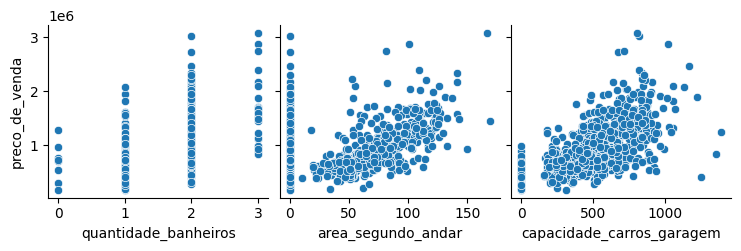

In [81]:
# Adicionando outras características 
# Analisando a relação entre o preço de venda e outras variáveis

sns.pairplot(df, y_vars='preco_de_venda', x_vars=['quantidade_banheiros', 
                                                  'area_segundo_andar', 
                                                  'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [82]:
# Importando statsmodels

import statsmodels.api as sm

In [83]:
# Adicionando constante

X_train = sm.add_constant(X_train)  # Adiciona uma constante (intercepto) ao modelo

In [85]:
# Adicionou o 1 na primeira coluna

X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1203,1.0,108.5072,1,62.9862,2,315,0
173,1.0,153.3779,0,0.0000,2,616,0
791,1.0,91.0420,0,0.0000,2,384,0
100,1.0,90.7633,1,70.1395,2,476,0
1283,1.0,150.1264,0,0.0000,2,834,0
